# Title Comprehensive Machine Learning and Deep Learning Framework for Enhanced Home-Based Heart Disease Prediction_EDA 

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/chenxi-liu233/24Fall_CSCI6806_Group10/main/cleveland_heart_disease_data.csv'

data = pd.read_csv(url)

data



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:

data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [6]:

data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

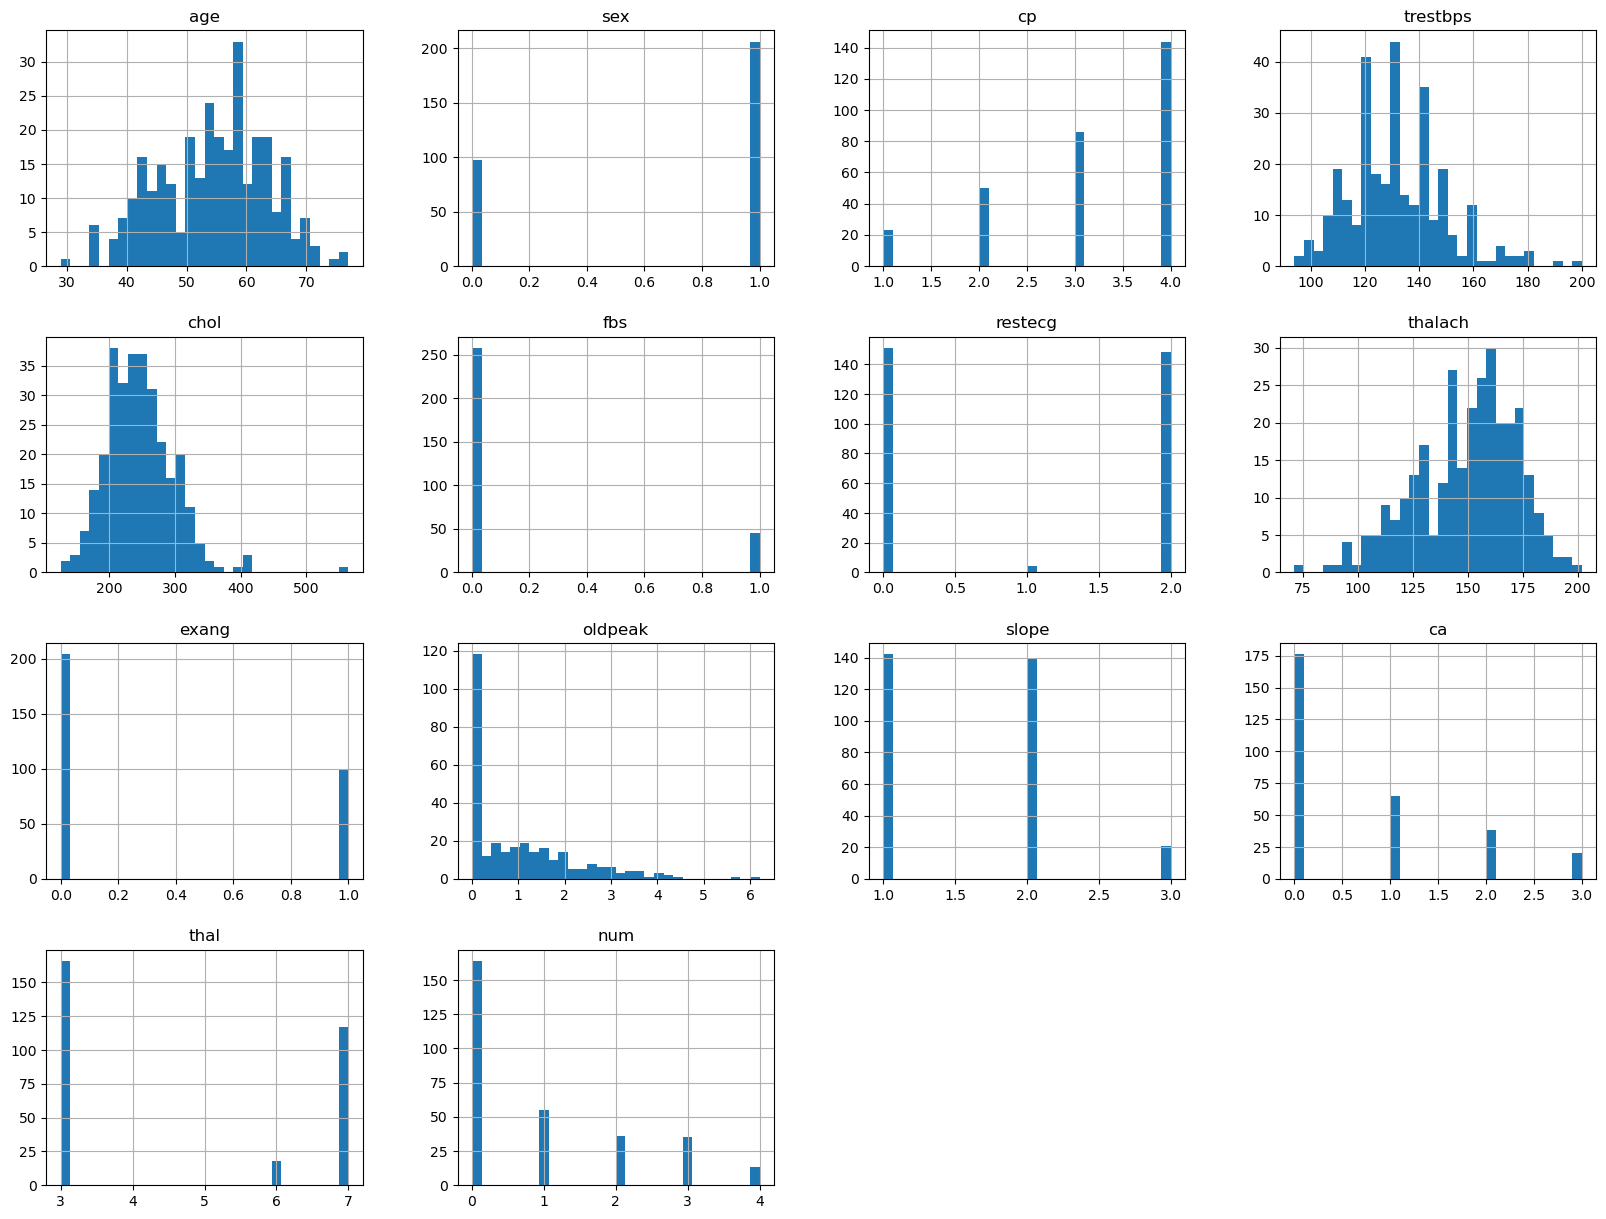

In [7]:
import matplotlib.pyplot as plt

data.hist(bins=30, figsize=(20, 15))
plt.show()


### Histograms Analysis

1. **Age Distribution**:
   - The data shows a roughly normal distribution, with most patients falling in the 50-60 age range.
   - There are fewer patients in the lower and upper extremes (ages below 40 and above 70).

2. **Sex**:
   - The majority of the patients in the dataset are male (denoted by `1`), while females (denoted by `0`) form a much smaller proportion.
   - This could indicate a higher prevalence of heart disease among males in this dataset.

3. **Chest Pain Type (CP)**:
   - There are four categories of chest pain, with `1` being the most frequent.
   - It appears that more severe chest pain (higher values of `cp`) is less common.

4. **Resting Blood Pressure (Trestbps)**:
   - The resting blood pressure is distributed between 100 and 200, with a peak around 120-140.
   - Most patients have blood pressure within a typical range, but there are some with significantly higher blood pressure.

5. **Cholesterol (Chol)**:
   - Cholesterol levels mostly range between 150 and 300, with a peak around 200-250.
   - There are a few outliers with very high cholesterol values (above 400).

6. **Fasting Blood Sugar (Fbs)**:
   - This feature is binary, with the majority of patients having fasting blood sugar less than 120 mg/dl (`0`).
   - Only a small portion of patients have fasting blood sugar greater than 120 mg/dl (`1`), indicating potential diabetes.

7. **Resting Electrocardiographic Results (Restecg)**:
   - This categorical feature has values 0, 1, and 2, with value `1` being the most frequent.
   - Value `2` is relatively rare.

8. **Maximum Heart Rate Achieved (Thalach)**:
   - The maximum heart rate varies between 75 and 200, with a peak around 150.
   - The distribution shows that most patients achieve heart rates in the 140-160 range during exercise.

9. **Exercise-Induced Angina (Exang)**:
   - This binary feature indicates whether exercise-induced angina is present (`1`) or not (`0`).
   - The majority of patients do not have exercise-induced angina.

10. **Oldpeak** (ST Depression Induced by Exercise):
    - Most patients have an oldpeak value close to zero, with a sharp decline beyond a value of 2.
    - This indicates that many patients have no or minimal ST depression during exercise.

11. **Slope of Peak Exercise ST Segment (Slope)**:
    - This categorical feature has values 1, 2, and 3, with value `2` being the most frequent.
    - A slope of 3 (a flat or downsloping ST segment) is less common.

12. **Number of Major Vessels Colored by Fluoroscopy (Ca)**:
    - Most patients have zero major vessels colored by fluoroscopy, while others have values from 1 to 3.
    - A small number of patients have higher values, indicating more severe heart conditions.

13. **Thalassemia (Thal)**:
    - This feature has categories 3, 6, and 7, with value `3` being the most frequent.
    - Values 6 and 7 represent abnormal results indicating heart issues.

14. **Target (Num)**:
    - The target variable indicates the presence of heart disease, with `0` being no heart disease and `1` to `4` indicating increasing severity.
    - Most patients either have no heart disease or very mild heart disease, while severe cases (value `4`) are less common.

### Summary:
- The dataset reveals that the majority of patients are middle-aged males, with common heart-related issues such as chest pain, elevated blood pressure, and cholesterol.
- Most patients do not have diabetes or exercise-induced angina.
- The histograms for the `num` feature show that many patients either have no heart disease or mild heart disease, with fewer cases of severe heart disease.
- These insights will help guide further exploration and modeling of heart disease prediction.


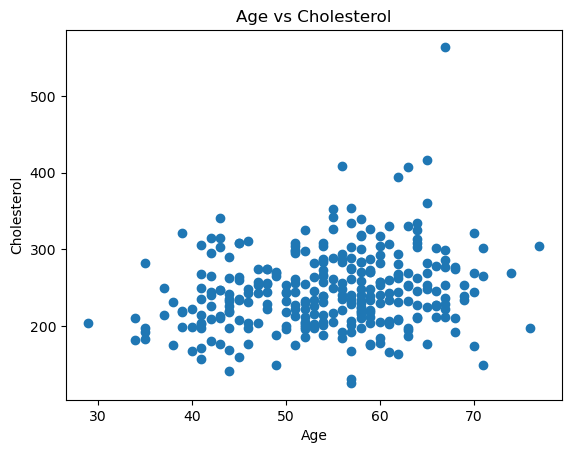

In [9]:

plt.scatter(data['age'], data['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol')
plt.show()


In [11]:

data.fillna(data.mean(), inplace=True)



### Scatter Plot Analysis: Age vs. Cholesterol

The scatter plot shows the relationship between age and cholesterol levels in the dataset. There is no clear linear correlation between age and cholesterol, as the data points are widely scattered across the age groups. Most cholesterol levels fall between 200 and 300, regardless of age, with a few outliers showing higher cholesterol levels above 400. 

The plot suggests that cholesterol levels do not strongly depend on age, as individuals in different age ranges exhibit similar cholesterol values. This indicates that other factors, aside from age, may have a more significant impact on cholesterol levels in this dataset.


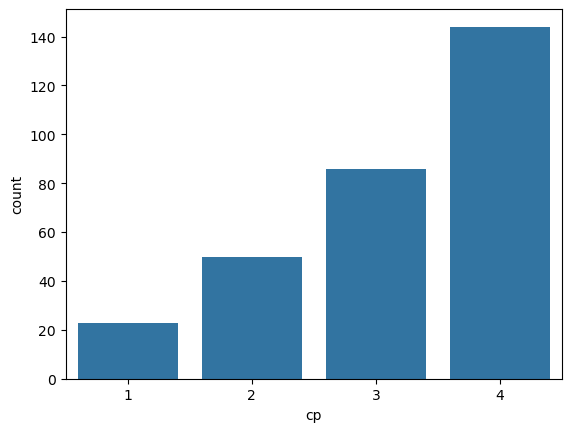

In [12]:
import seaborn as sns

sns.countplot(x='cp', data=data)
plt.show()


### Bar Chart Analysis: Chest Pain Types (CP)

The bar chart illustrates the distribution of chest pain types (denoted as "cp") in the dataset. The chest pain types are categorized as 1, 2, 3, and 4, with type 4 being the most frequent. Specifically, type 4 occurs over 140 times, while type 1 appears less than 30 times. 

This shows a clear imbalance in the chest pain categories, with type 4 dominating the dataset. Understanding this distribution is essential when analyzing how chest pain type correlates with heart disease outcomes, as it may introduce bias if certain chest pain types are underrepresented.


In [16]:

print(data.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


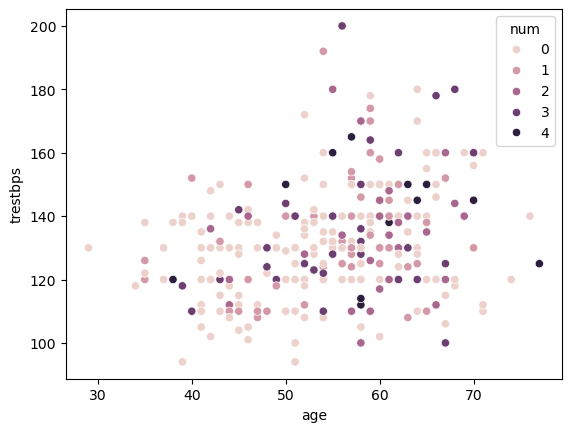

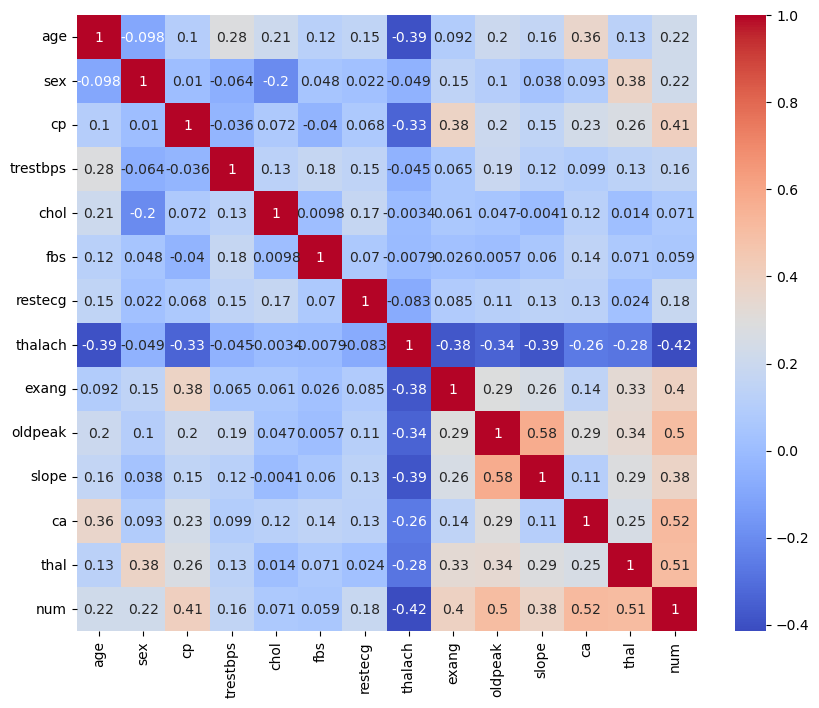

In [18]:

sns.scatterplot(x='age', y='trestbps', hue='num', data=data)
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  
plt.show()


### Analysis of Visualized Data

1. **Histograms (First Image)**:
   - **Age**: Most patients fall between 40-60 years old, with a few outliers in the 70s.
   - **Sex**: The data shows that there are significantly more male patients (1) than female (0).
   - **Chest Pain Type (cp)**: Type 4 chest pain is the most common, followed by types 3 and 2.
   - **Resting Blood Pressure (trestbps)**: The majority of patients have blood pressure in the 120-140 range.
   - **Cholesterol (chol)**: Cholesterol levels are mostly distributed between 200-300.
   - **Other Variables**: There are patterns in some features like "exang" (exercise-induced angina) and "slope", where specific values dominate, such as binary or categorical nature.

2. **Scatter Plot of Age vs Cholesterol (Second Image)**:
   This plot shows the relationship between age and cholesterol. There doesn’t appear to be a strong correlation, as cholesterol levels are scattered across all ages, although cholesterol tends to concentrate between 200-300 mg/dL across all ages.

3. **Count Plot of Chest Pain Types (Third Image)**:
   This shows that type 4 chest pain (cp = 4) is the most prevalent in this dataset, followed by type 3 and type 2. Type 1 chest pain is the least common.

4. **Scatter Plot (Age vs Resting Blood Pressure) (Fourth Image)**:
   The scatter plot indicates that as age increases, there’s a slight trend toward higher blood pressure, though the variability is high. Different shades represent different levels of the target variable (`num`), which relates to heart disease severity.

5. **Correlation Heatmap (Fifth Image)**:
   The heatmap reveals correlations between variables. Strong positive correlations include:
   - **ca (number of major vessels colored by fluoroscopy)** and **num** (target), suggesting that more colored vessels correlate with heart disease.
   - **oldpeak (ST depression induced by exercise)** and **num** also show a positive correlation.
   Negative correlations, such as between **thalach (maximum heart rate achieved)** and **num**, suggest lower heart rates correspond to higher heart disease presence.

These plots indicate key features like age, chest pain type, resting blood pressure, cholesterol, and max heart rate that could be influential in predicting heart disease. Further modeling and deeper EDA will be necessary to validate these insights.


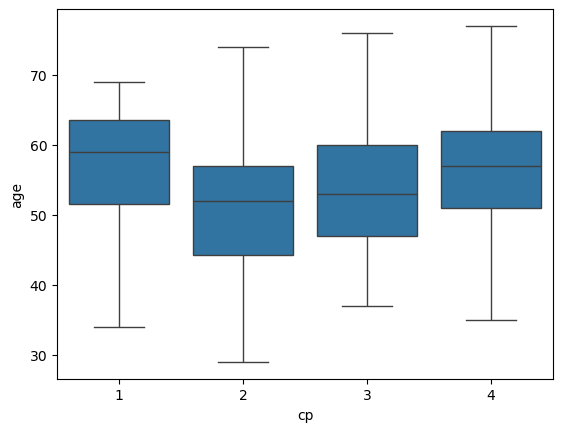

In [19]:

sns.boxplot(x='cp', y='age', data=data)
plt.show()


### Box Plot Analysis: Chest Pain Type (CP) vs. Age

The box plot illustrates the relationship between **cp** (chest pain type) and **age**. The four chest pain types (1-4) are plotted on the x-axis, while age is plotted on the y-axis. Here’s the interpretation of the chart:

- For **cp = 1**, the median age is around 60, with most patients aged between 50 and 70.
- For **cp = 2**, the median age is slightly lower, around 55, and the range of ages is quite broad, spanning from about 40 to 70.
- **cp = 3** shows a similar distribution to cp=2, with the median age around 55 and a spread of ages.
- For **cp = 4**, the median age is slightly higher, around 58-60, and the range spans from approximately 45 to 70.

This plot highlights that the patients with different types of chest pain cover a wide age range, but on average, those with chest pain types 1 and 4 tend to be older.


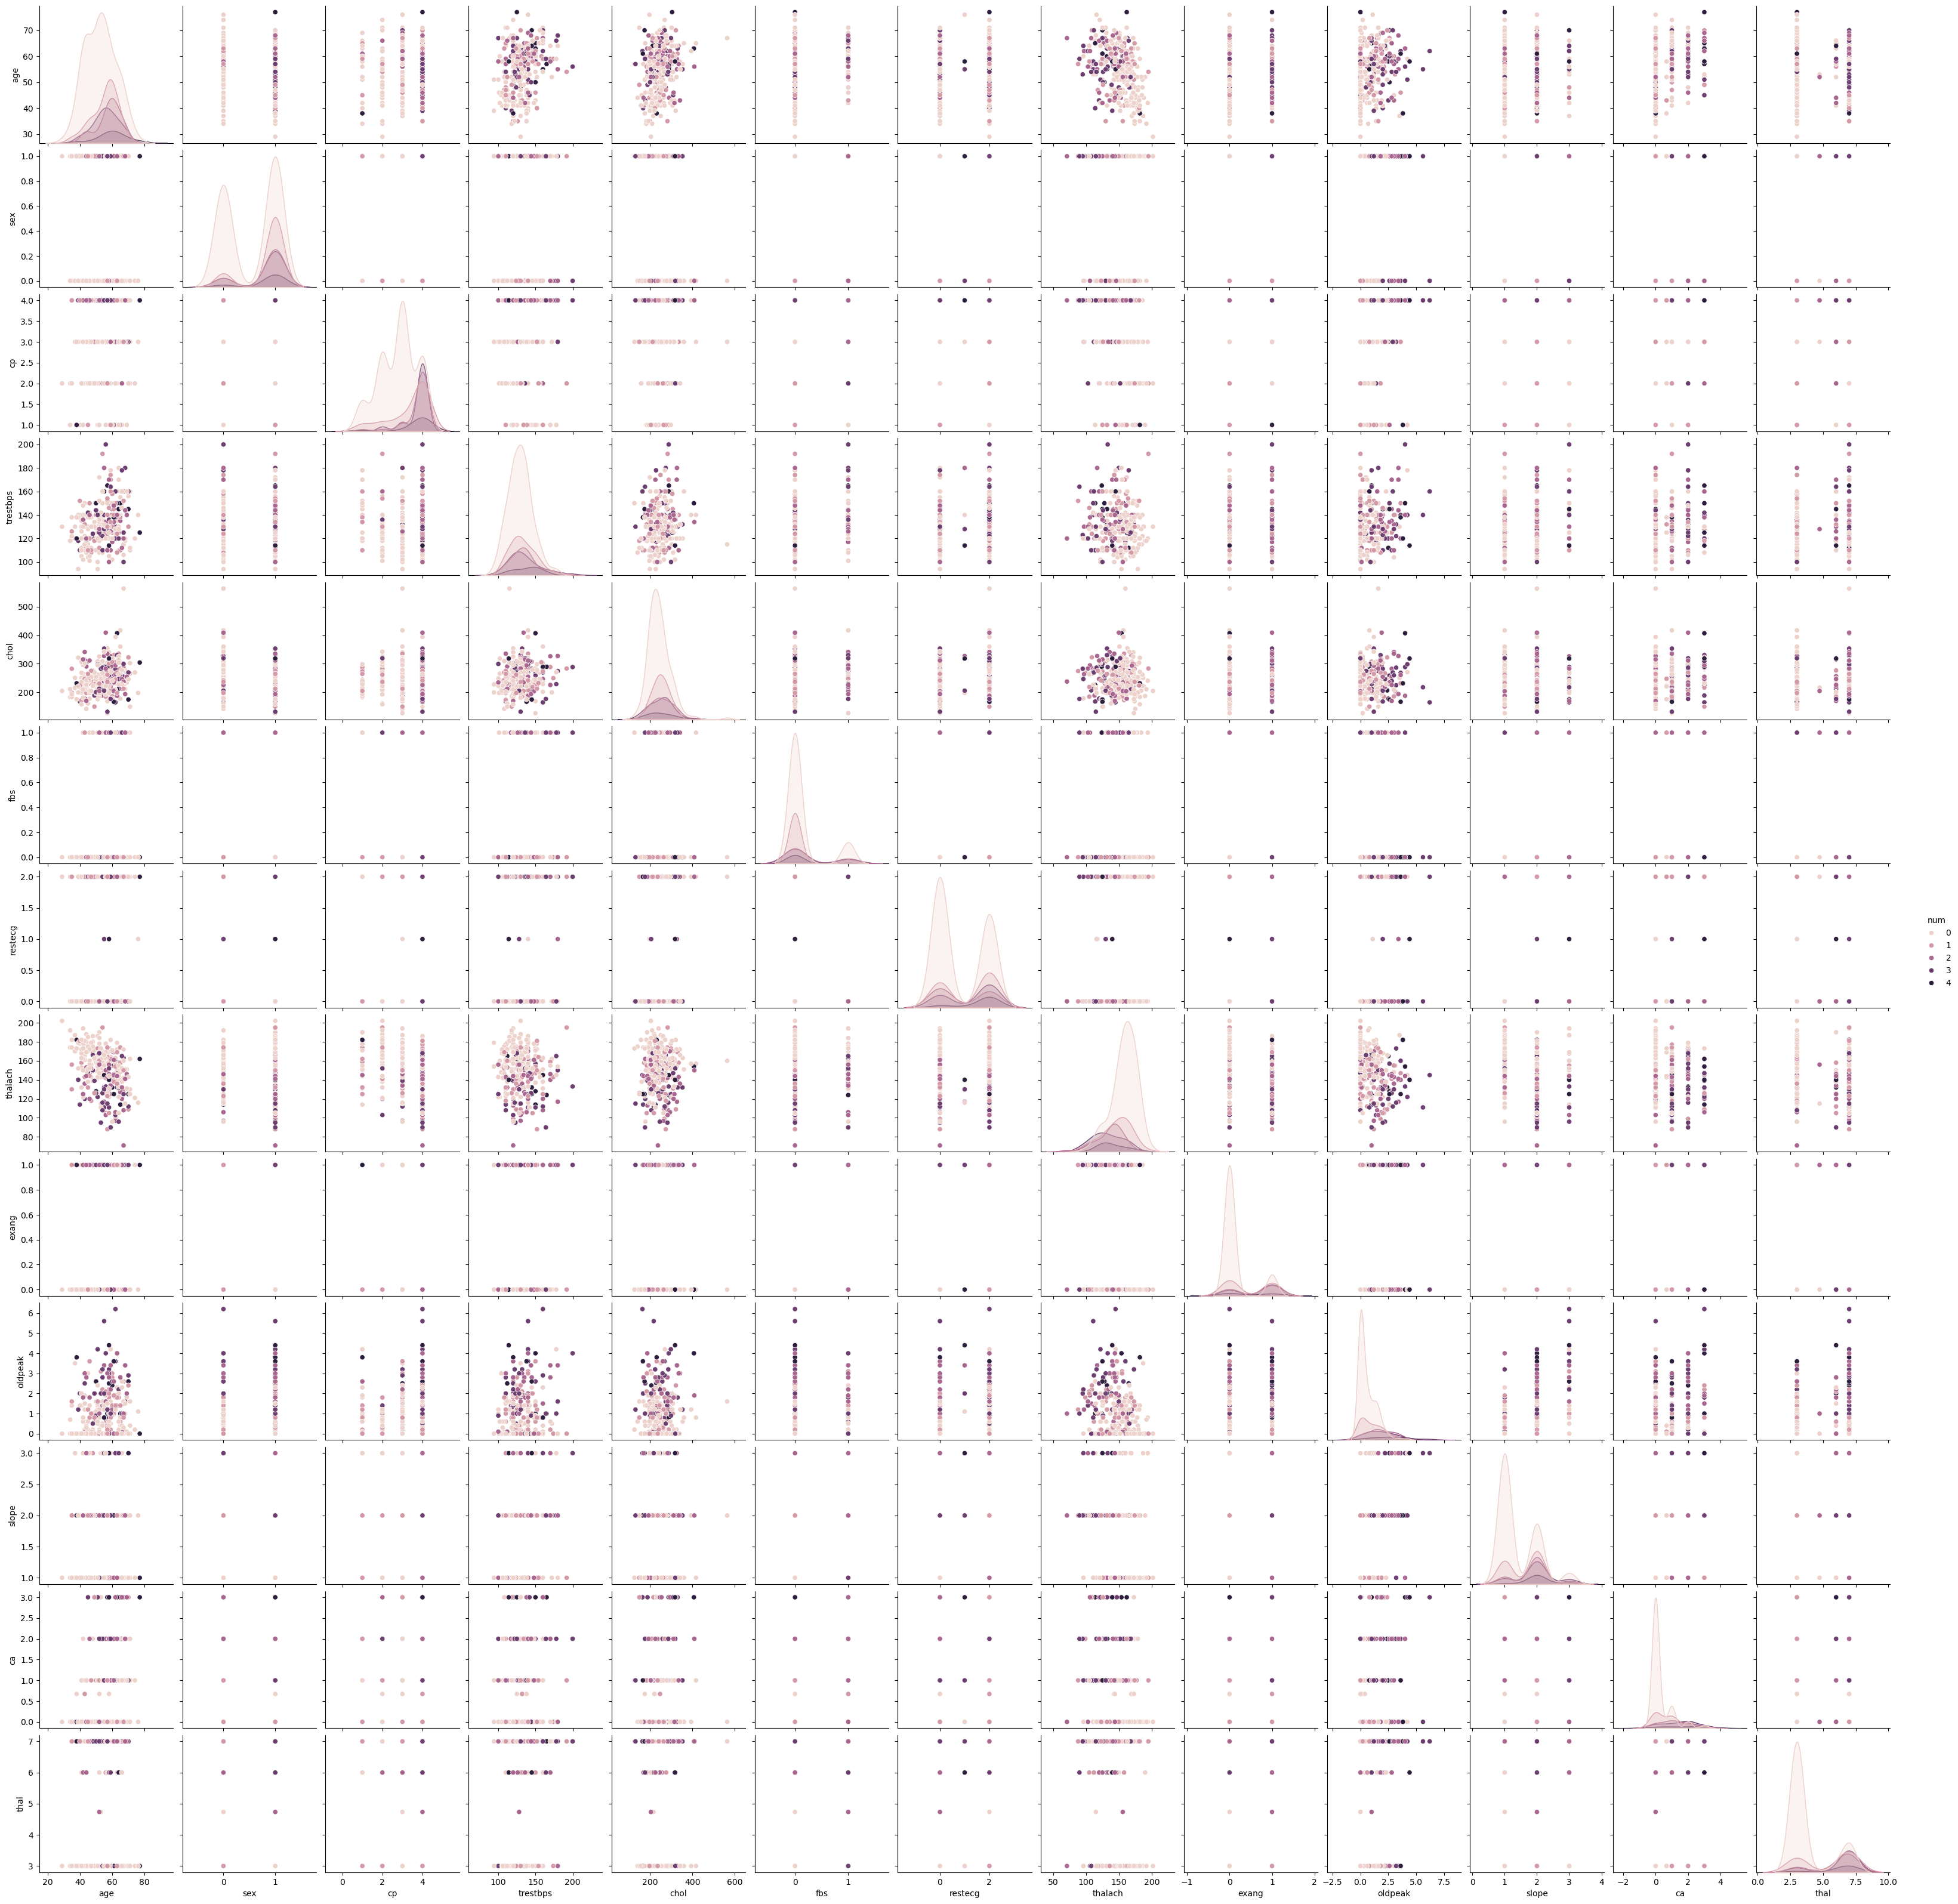

In [21]:

sns.pairplot(data, hue='num')  
plt.show()


### Analysis of Visualized Data

1. **Distribution of Numerical Variables (Histograms)**:
   The histograms show the distribution of various numerical features such as age, cholesterol levels (chol), and resting blood pressure (trestbps). For instance, the age distribution shows that most individuals are between 40 and 70 years old. Cholesterol levels are concentrated around 200–300 mg/dL, and resting blood pressure is mostly within 120–160 mmHg. This analysis helps to understand the central tendency and spread of these variables.

2. **Age vs Cholesterol Scatter Plot**:
   The scatter plot between age and cholesterol shows no strong correlation between these variables. People of all ages exhibit varying cholesterol levels, with some outliers having extremely high cholesterol (above 500 mg/dL), though most are clustered in the 200–300 mg/dL range.

3. **Count Plot of Chest Pain Type (cp)**:
   The count plot of chest pain types (cp) indicates that most individuals have type 4 chest pain (the most severe), followed by type 3 and type 2. Type 1 is less common. This provides insight into the distribution of chest pain categories among the patients.

4. **Scatter Plot of Age vs Resting Blood Pressure (trestbps)**:
   This scatter plot, color-coded by the target variable (`num`), which represents heart disease severity, shows no clear relationship between age and resting blood pressure. However, people with higher disease severity (`num` = 4) tend to have slightly higher resting blood pressures.

5. **Correlation Heatmap**:
   The heatmap reveals correlations between numerical features:
   - Moderate positive correlations between `num` (heart disease severity) and features such as `cp` (chest pain type), `ca` (number of major vessels colored by fluoroscopy), and `thal` (thalassemia).
   - Negative correlation between `num` and `thalach` (maximum heart rate achieved), suggesting lower heart rates are associated with more severe heart disease.
   - `Oldpeak` (ST depression) shows a positive correlation with heart disease severity.

6. **Boxplot of Chest Pain Type (cp) vs Age**:
   The boxplot demonstrates the distribution of ages across different chest pain types. The age range is relatively consistent, though individuals with higher chest pain types tend to be slightly older. This plot provides insights into how age relates to chest pain severity.

7. **Pairplot of Numerical Features**:
   The pairplot shows scatter plots between different numerical features, with heart disease severity (`num`) represented by different colors. It highlights relationships such as the inverse relationship between `thalach` and `num`, where individuals with higher `thalach` tend to have lower heart disease severity.

These visualizations provide a comprehensive exploratory data analysis (EDA) of the dataset, revealing key trends, relationships between variables, and potential insights into factors associated with heart disease severity.
